# Tensorflow Hub - Transfer Learning
* Efficientnet Model



* Resnet Model

In [ ]:
import tensorflow as tf


In [ ]:
!nvidia-smi

Sat May 15 07:56:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    32W /  70W |   9024MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

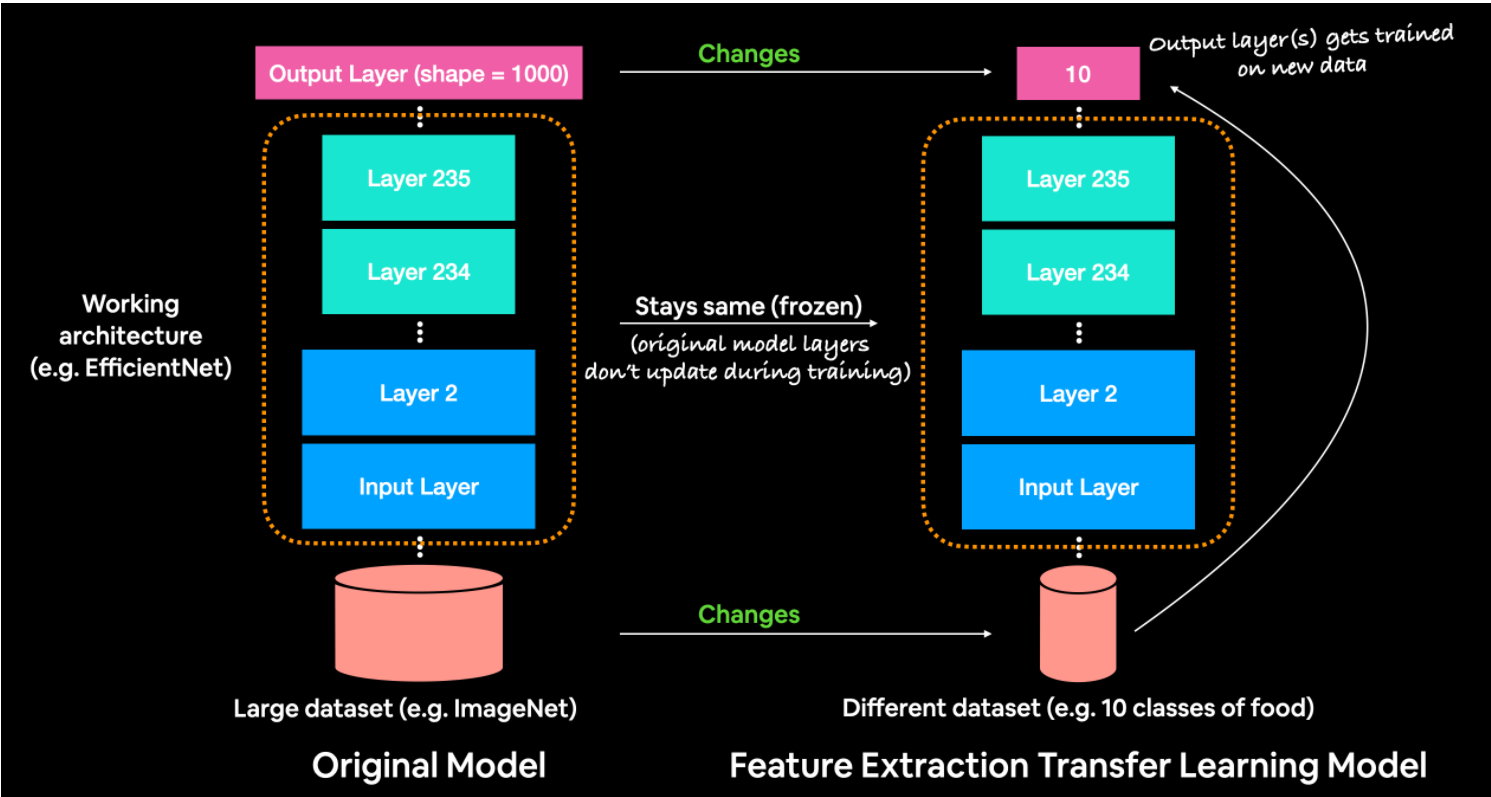

In [ ]:
import zipfile



!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2021-05-15 07:56:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   234MB/s    in 0.7s    

2021-05-15 07:56:31 (234 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")



There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent

# Image Data Generators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size = (224,224),batch_size = BATCH_SIZE,
                                               class_mode = 'categorical')
test_data = test_datagen.flow_from_directory(test_dir,target_size = IMAGE_SHAPE, batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Setting up Callbacks

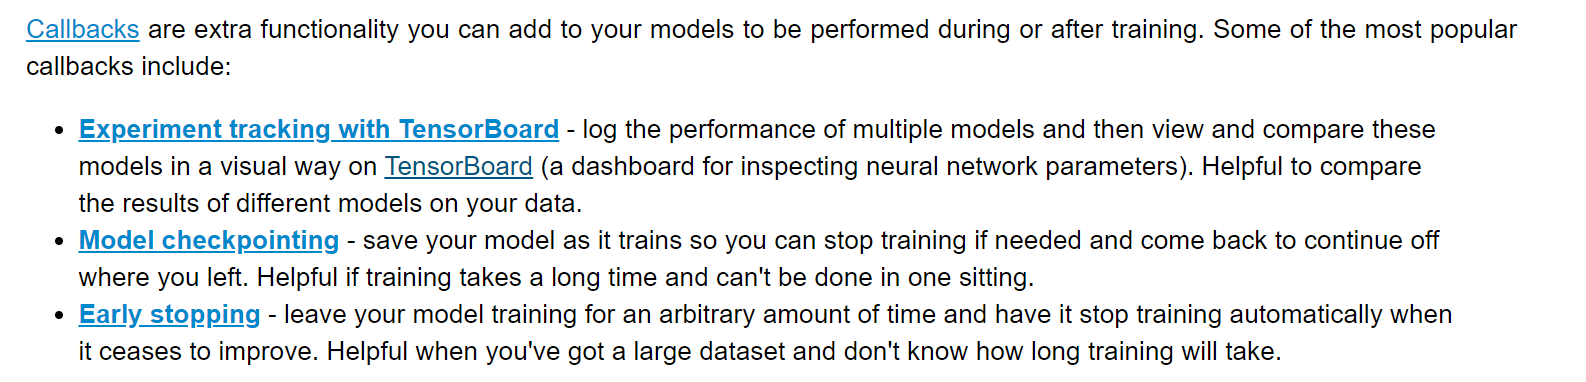

## Function : Tensorboard Callback 

In [ ]:
from datetime import datetime    
import pytz    
def create_tensorboard_callback(dir_name, experiment_name):
  
  tz_IND = pytz.timezone('Asia/Kolkata')   
  datetime_NY = datetime.now(tz_IND)  
  log_dir = dir_name + "/" + experiment_name + "/" + datetime_NY.strftime("%Y-%m-%d %H:%M:%S")
  print(log_dir)
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

* We will use the two models from Tensorflow Hub

# Function : Plot History Loss Acc Curves

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #Plot the Loss Graph
  plt.plot(epochs, loss, label = 'train_loss')
  plt.plot(epochs,val_loss,label = 'val_loss')
  plt.title('Loss vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  #Plot the Accuracy Graph
  plt.figure()
  plt.plot(epochs,acc,label = 'train_accuracy')
  plt.plot(epochs,val_acc,label = 'val_accuracy')
  plt.title('Accuracy vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend();

# Tensorflow Hub Models Import

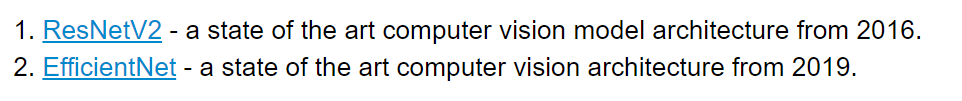

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# EfficientNet0 feature vector
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

## Function : Tensorflow Hub Model

In [ ]:
def create_model(model_url,num_classes = 10):
  feature_extraction_layer = hub.KerasLayer(model_url,trainable = False,name = 'feature_extraction_layer',input_shape = IMAGE_SHAPE + (3,))
  model = tf.keras.Sequential([
                               feature_extraction_layer,
                               layers.Dense(num_classes, activation = 'softmax', name= 'final_output_layer')
  ])
  return model

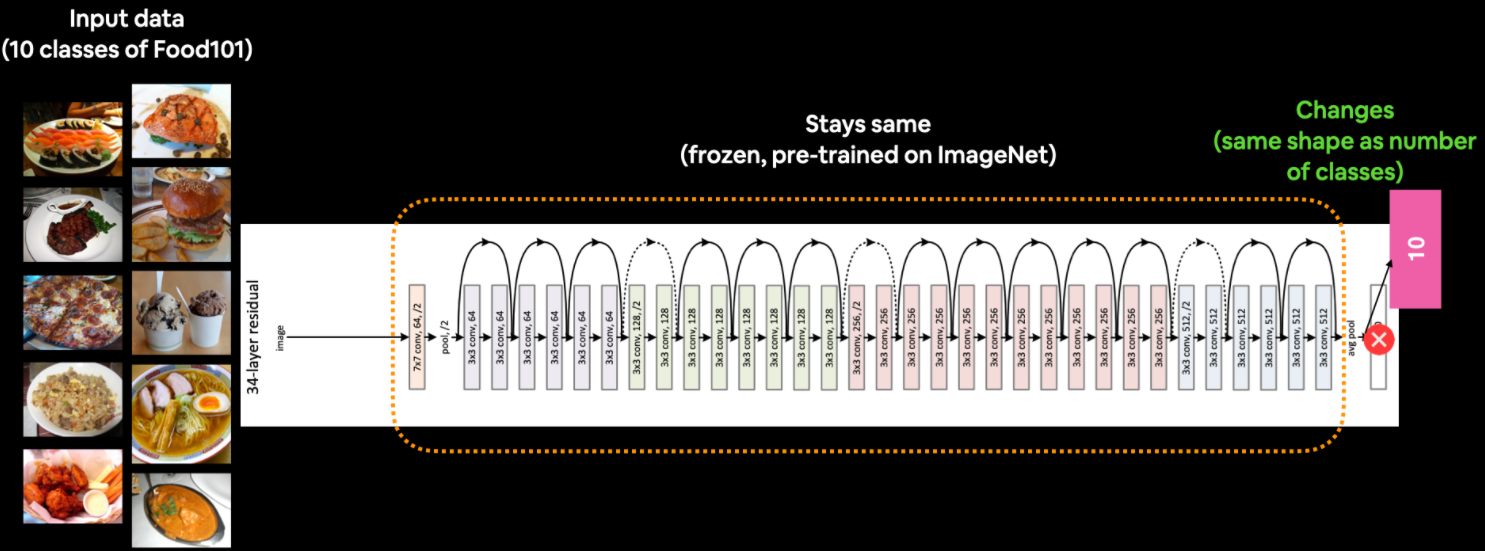

# Resnet Model 

In [ ]:
resnet_model = create_model(resnet_url,num_classes = train_data.num_classes)

resnet_model.compile(loss= 'categorical_crossentropy',
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

In [ ]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
final_output_layer (Dense)   (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_history = resnet_model.fit(train_data,epochs = 7, validation_data = test_data,
                                  callbacks = [create_tensorboard_callback(dir_name = 'tensorflow_hub',
                                                                           experiment_name = 'resnet50_V2_model')])

tensorflow_hub/resnet50_V2_model/2021-05-15 13:27:45
Saving TensorBoard log files to: tensorflow_hub/resnet50_V2_model/2021-05-15 13:27:45
Epoch 1/7
24/24 [==============================] - 21s 784ms/step - loss: 2.3618 - accuracy: 0.1873 - val_loss: 1.2129 - val_accuracy: 0.6172
Epoch 2/7
24/24 [==============================] - 17s 710ms/step - loss: 0.9881 - accuracy: 0.7233 - val_loss: 0.8517 - val_accuracy: 0.7304
Epoch 3/7
24/24 [==============================] - 17s 708ms/step - loss: 0.6703 - accuracy: 0.8035 - val_loss: 0.7368 - val_accuracy: 0.7640
Epoch 4/7
24/24 [==============================] - 16s 708ms/step - loss: 0.4930 - accuracy: 0.8739 - val_loss: 0.6970 - val_accuracy: 0.7736
Epoch 5/7
24/24 [==============================] - 16s 702ms/step - loss: 0.4284 - accuracy: 0.9008 - val_loss: 0.6538 - val_accuracy: 0.7800
Epoch 6/7
24/24 [==============================] - 16s 701ms/step - loss: 0.3635 - accuracy: 0.9209 - val_loss: 0.6417 - val_accuracy: 0.7920
Epoch 7/7

In [ ]:
resnet_model.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 0.6401 - accuracy: 0.7844


[0.6401030421257019, 0.7843999862670898]

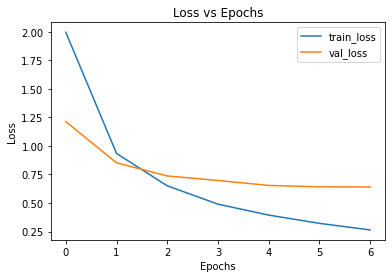

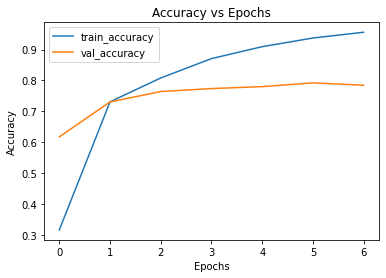

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
final_output_layer (Dense)   (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


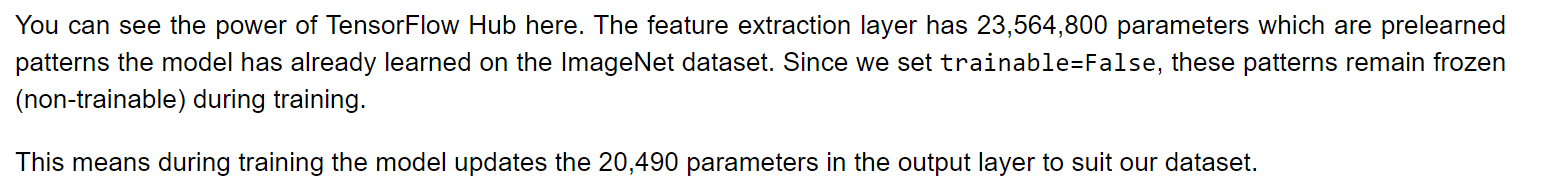

# EfficientNet Model

In [ ]:
efficientnet_model = create_model(model_url = efficientnet_url,
                                  num_classes = train_data.num_classes)

efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer = 'Adam',
                           metrics = ['accuracy'])

efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs = 7,
                                              validation_data = test_data,
                                              callbacks = [create_tensorboard_callback('tensorflow_hub',
                                                                                       experiment_name='efficentnet_B0_model')])

tensorflow_hub/efficentnet_B0_model/2021-05-15 13:30:09
Saving TensorBoard log files to: tensorflow_hub/efficentnet_B0_model/2021-05-15 13:30:09
Epoch 1/7
24/24 [==============================] - 26s 805ms/step - loss: 2.0425 - accuracy: 0.3321 - val_loss: 1.2966 - val_accuracy: 0.7300
Epoch 2/7
24/24 [==============================] - 16s 671ms/step - loss: 1.1487 - accuracy: 0.7724 - val_loss: 0.8684 - val_accuracy: 0.8112
Epoch 3/7
24/24 [==============================] - 16s 673ms/step - loss: 0.8032 - accuracy: 0.8068 - val_loss: 0.6997 - val_accuracy: 0.8408
Epoch 4/7
24/24 [==============================] - 16s 671ms/step - loss: 0.6109 - accuracy: 0.8680 - val_loss: 0.6108 - val_accuracy: 0.8584
Epoch 5/7
24/24 [==============================] - 16s 669ms/step - loss: 0.5269 - accuracy: 0.8892 - val_loss: 0.5572 - val_accuracy: 0.8624
Epoch 6/7
24/24 [==============================] - 15s 665ms/step - loss: 0.4655 - accuracy: 0.9028 - val_loss: 0.5214 - val_accuracy: 0.8708
Epo

In [ ]:
efficientnet_model.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 0.4935 - accuracy: 0.8716


[0.49349600076675415, 0.8715999722480774]

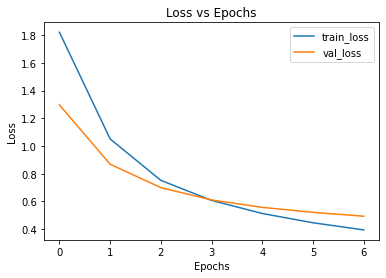

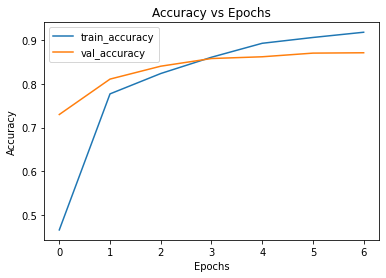

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
final_output_layer (Dense)   (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


The EfficientNetB0 model does even better than the ResNetV250 model! Achieving over 85% accuracy on the test set.

## Efficientnet vs other Models -> Efficieny Graph

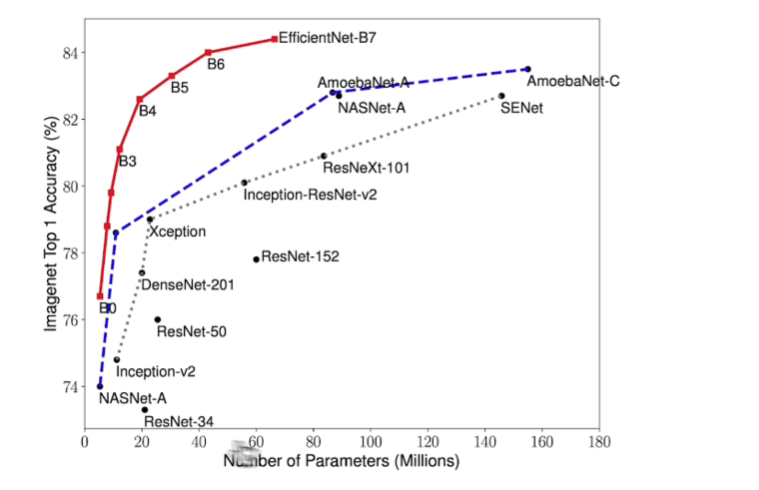

# Transfer Learning - Types

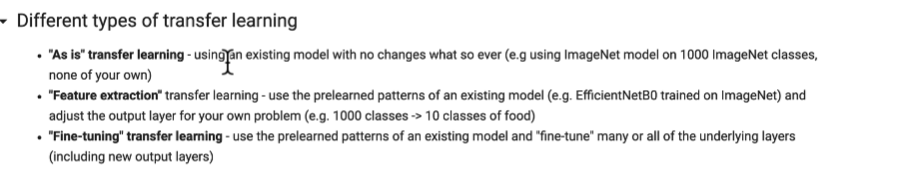

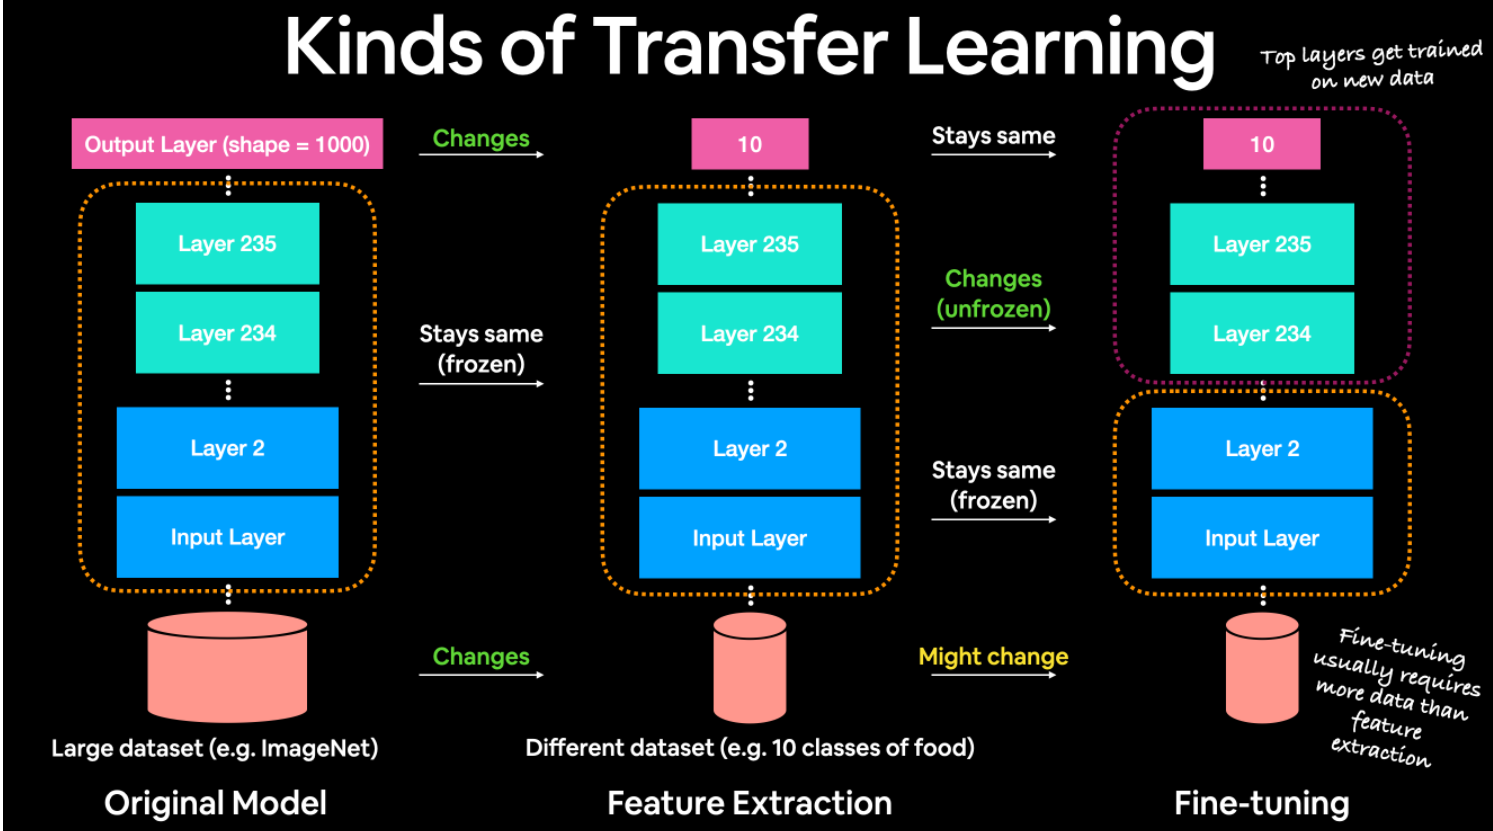


# Integrating our model results on Tensorboard

In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2 Moodels - Classification (10 Classes)" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

2021-05-15 08:02:25.108259: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2

In [ ]:
# https://tensorboard.dev/experiment/kyXckNMYQhGtjnbP1i1fAg/

In [ ]:
!tensorboard dev list

2021-05-15 08:03:10.099455: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
https://tensorboard.dev/experiment/kyXckNMYQhGtjnbP1i1fAg/
	Name                 [No Name]
	Description          [No Description]
	Id                   kyXckNMYQhGtjnbP1i1fAg
	Created              2021-05-15 08:03:01 (31 seconds ago)
	Updated              2021-05-15 08:03:08 (24 seconds ago)
	Runs                 12
	Tags                 3
	Scalars              112
	Tensor bytes         0
	Binary object bytes  17735165
Total: 1 experiment(s)


In [ ]:

# # Delete an experiment
# !tensorboard dev delete --experiment_id 'fdfgdfg fdg'